The Sparks Foundation - GRIP2021


## Ramsha Khan
# TASK 1 - Prediction using Supervised ML

Predicting the percentage score of a student based on the number of hours they studied using the Simple Linear Regression ML Algorithm.

### 1. Importing required libraries and packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

### 2. Importing and loading the dataset

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("First 10 rows of the dataset:- ")
df.head(10)

First 10 rows of the dataset:- 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### 3. Checking for null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


###### Since there are no null values present in the dataset, there's no requirement of dealing with missing values.

### 4. Statistical Observations

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From the above observations, we can infer that the mean value is greater than the median and that there are no outliers in the dataset.

### 5. Plotting the relation between the Hours variable and the Scores variable

######    1. Visualizing using density plot

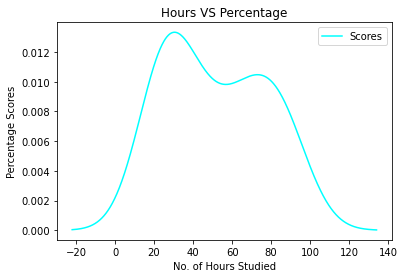

In [5]:
df.plot(x='Hours', y='Scores', kind='kde', color='cyan')
plt.title('Hours VS Percentage')
plt.xlabel('No. of Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

######    2. Visualizing using scatter plot

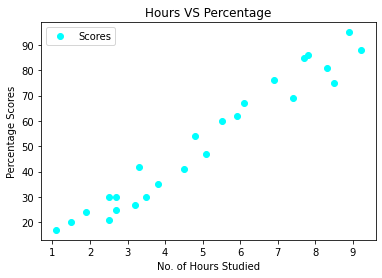

In [6]:
df.plot(x='Hours', y='Scores', style='o', color='cyan')
plt.title('Hours VS Percentage')
plt.xlabel('No. of Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

A positive linear relation between the variables is observed.

### 6. Splitting the data into 'attributes' and 'labels'
Preparing the data for model creation by sdividing the data into training and testing sets where we train the algorithm using the training set, and test the algorithm using the testing set.

20% of the dataset is used for testing.


In [7]:
X= df.iloc[:, :-1].values
Y= df.iloc[:, 1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 0)

### 7. Training the Algorithm

In [9]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train, Y_train)
print("Training complete.")

Training complete.


### 8. Plotting the Regression Line

The coefficient is:  [9.91065648]
The intercept is:  2.018160041434683


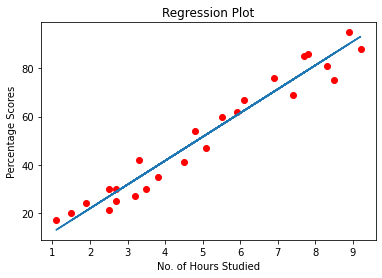

In [10]:
print("The coefficient is: ", model.coef_)
print("The intercept is: ", model.intercept_)
regline= model.coef_*X+model.intercept_
plt.scatter(X, Y, c='red')
plt.plot(X, regline)
plt.title('Regression Plot')
plt.xlabel('No. of Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

### 9. Prediction using the Model
Using our trained algorithm, we make some predictions

In [11]:
Y_pred= model.predict(X_test)
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### 10. Comparing the actual and predicted outcomes

In [12]:
df2= pd.DataFrame({'Actual':Y_test, 'Predicted': Y_pred})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### 11. Predicting the result for 9.25 hours of study

In [13]:
hrs= 9.25
required_pred= model.predict([[hrs]])
required_pred[0]

93.69173248737538

### 12. Model Evaluation
The performance of the algorithm is evaluated using the mean square error.

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(Y_test, Y_pred))
print("Accuracy of the Model (in %): ", r2_score(Y_test, Y_pred)*100)

Mean Absolute Error:  4.183859899002975
Accuracy of the Model (in %):  94.54906892105356


#### The created model has 94.5% accuracy.